In [6]:
import pandas as pd

In [8]:
data = pd.read_csv('/Users/pault/paultangerusda drive/2020_Sync/COVID analysis (Paul Tanger)/data/SME_data/from_Anna/long_rfs_pt.csv') 

/usr/local/anaconda3/envs/py377/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (4,7,8,9,10,11,12,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4790354 entries, 0 to 4790353
Data columns (total 15 columns):
 #   Column        Dtype  
---  ------        -----  
 0   country       object 
 1   round_number  int64  
 2   round_month   object 
 3   weight        float64
 4   hhid          object 
 5   sector        object 
 6   state         object 
 7   gender        object 
 8   age           object 
 9   age_range     object 
 10  category      object 
 11  question      object 
 12  short_name    object 
 13  disaggregate  object 
 14  value         object 
dtypes: float64(1), int64(1), object(13)
memory usage: 548.2+ MB


In [9]:
# check RECOVR data from Burkina Faso
BF_recovr = pd.io.stata.read_stata('/Users/pault/paultangerusda drive/2020_Sync/COVID analysis (Paul Tanger)/data/SME_data/RECOVR_Burkina_Faso/Round 1 Data/BFA_RECOVR_round1.dta')

In [10]:
BF_recovr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1357 entries, 0 to 1356
Columns: 279 entries, SubmissionDate to PPI
dtypes: category(174), float32(1), float64(8), int16(1), int32(1), int8(3), object(91)
memory usage: 1.3+ MB


In [11]:
BF_recovr.head()

,SubmissionDate,starttime,endtime,username,duration,caseid,provider,type,country,replicate_id,...,end_end,call_status,call_status_label,instanceID,formdef_version,key,area,dem5v,dem7_op,PPI
0,6/6/2020 9:25,6/6/2020 8:27,6/6/2020 8:23,e2,4119,5.0,Onatel,Mobile,Burkina Faso,1,...,2020-Jun-6 09:54:23,Completed,Entretien complet/terminÃ©,uuid:4e436dc2-ddb4-41d3-8da9-c78dae3e68af,2006060148,uuid:4e436dc2-ddb4-41d3-8da9-c78dae3e68af,Urbain,604,NaN,0.525129
1,6/9/2020 8:28,6/9/2020 9:57,6/9/2020 10:20,e8,1406,10.0,Onatel,Mobile,Burkina Faso,1,...,2020-Jun-9 10:18:52,Completed,Entretien complet/terminÃ©,uuid:fb939c82-12a1-4bc5-901c-ca2cf2c7d2ef,2006082317,uuid:fb939c82-12a1-4bc5-901c-ca2cf2c7d2ef,Urbain,106,NaN,0.301776
2,6/6/2020 9:54,6/6/2020 9:09,6/6/2020 10:21,e12,3317,34.0,Onatel,Mobile,Burkina Faso,1,...,2020-Jun-6 10:05:00,Completed,Entretien complet/terminÃ©,uuid:8a582ee3-a205-4c4c-bb96-50f6659de48c,2006060148,uuid:8a582ee3-a205-4c4c-bb96-50f6659de48c,Rural,515,NaN,0.454815
3,6/8/2020 7:28,6/8/2020 7:38,6/8/2020 8:00,e13,1001,37.0,Onatel,Mobile,Burkina Faso,1,...,2020-Jun-8 08:00:11,Completed,Entretien complet/terminÃ©,uuid:4f197c49-377b-411f-8c19-a571c1def818,2006071937,uuid:4f197c49-377b-411f-8c19-a571c1def818,Urbain,163,NaN,0.927115
4,6/6/2020 9:25,6/6/2020 8:30,6/6/2020 8:39,e2,2332,92.0,Onatel,Mobile,Burkina Faso,1,...,2020-Jun-6 14:09:59,Completed,Entretien complet/terminÃ©,uuid:dc63af57-b798-48a1-8795-80064c631574,2006060148,uuid:dc63af57-b798-48a1-8795-80064c631574,Urbain,556,NaN,0.156518


In [13]:
list(BF_recovr.columns)

['SubmissionDate',
 'starttime',
 'endtime',
 'username',
 'duration',
 'caseid',
 'provider',
 'type',
 'country',
 'replicate_id',
 'sampling',
 'last_call_status',
 'num_calls',
 'call_num',
 'stop_at',
 'now_closed',
 'now_complete',
 'users',
 'pub_to_users',
 'supervisor',
 'supervisor_id',
 'call_date',
 'call_reached',
 'start_intro',
 'cons1',
 'cons1_osp',
 'tmp_cons1_dsp',
 'cons1_b',
 'reassign',
 'reassign_formid',
 'cons1_c',
 'dem1',
 'dem1_1',
 'dem1_fin',
 'dem1c',
 'cons1_e',
 'cons1_f',
 'cons2',
 'cons3',
 'end_intro',
 'start_dem',
 'dem2',
 'dem3',
 'dem3_id',
 'dem4_id',
 'dem5_id',
 'dem6',
 'dem7',
 'dem7c',
 'dem8',
 'dem8_osp',
 'dem9',
 'dem9a',
 'dem10a',
 'dem10b',
 'dem11',
 'dem12',
 'dem13',
 'end_dem',
 'start_hlth',
 'hlth1',
 'hlth2',
 'hlth3',
 'hlth4',
 'hlth5',
 'hlth5_1',
 'hlth5_2',
 'hlth5_3',
 'hlth5_4',
 'hlth5__666',
 'hlth5_osp',
 'hlth7',
 'hlth8',
 'hlth9',
 'end_hlth',
 'start_covm',
 'cov1',
 'cov2',
 'cov3',
 'cov4a',
 'cov4',
 'cov5',

survey questions are here: https://docs.google.com/spreadsheets/d/1hiv5dr6jXcVQhgGsnRZb7pRGCJuUybud1Go1CUdRExU/edit#gid=0

In [14]:
# INC, SME questions?
check = ['inc1',
 'inc2',
 'inc3',
 'inc4',
 'inc4_osp',
 'inc5',
 'inc5_1',
 'inc5_2',
 'inc5_3',
 'sme1',
 'inc6',
 'inc6_1',
 'inc6_0',
 'sme_note',
 'sme2',
 'sme3',
 'sme4',
 'sme5',
 'sme6',
 'sme7',
 'sme8',
 'sme9',
 'sme10']

In [16]:
to_check = BF_recovr[check]

In [18]:
to_check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1357 entries, 0 to 1356
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   inc1      1356 non-null   category
 1   inc2      1356 non-null   category
 2   inc3      1356 non-null   category
 3   inc4      604 non-null    category
 4   inc4_osp  1357 non-null   object  
 5   inc5      0 non-null      category
 6   inc5_1    51 non-null     category
 7   inc5_2    51 non-null     category
 8   inc5_3    50 non-null     category
 9   sme1      1357 non-null   object  
 10  inc6      793 non-null    category
 11  inc6_1    637 non-null    category
 12  inc6_0    156 non-null    category
 13  sme_note  0 non-null      category
 14  sme2      739 non-null    category
 15  sme3      741 non-null    category
 16  sme4      741 non-null    category
 17  sme5      740 non-null    category
 18  sme6      737 non-null    category
 19  sme7      735 non-null    category
 20  sme8    

In [21]:
to_check = to_check[to_check['inc2'] == 'Yes']

In [23]:
to_check = to_check.dropna(subset=['sme3'], axis=0)

In [24]:
to_check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 1356
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   inc1      480 non-null    category
 1   inc2      480 non-null    category
 2   inc3      480 non-null    category
 3   inc4      370 non-null    category
 4   inc4_osp  480 non-null    object  
 5   inc5      0 non-null      category
 6   inc5_1    29 non-null     category
 7   inc5_2    29 non-null     category
 8   inc5_3    28 non-null     category
 9   sme1      480 non-null    object  
 10  inc6      476 non-null    category
 11  inc6_1    389 non-null    category
 12  inc6_0    87 non-null     category
 13  sme_note  0 non-null      category
 14  sme2      479 non-null    category
 15  sme3      480 non-null    category
 16  sme4      477 non-null    category
 17  sme5      477 non-null    category
 18  sme6      476 non-null    category
 19  sme7      475 non-null    category
 20  sme8     

In [27]:
grouped = to_check.groupby('sme2').agg('count')

In [29]:
grouped.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 2 entries, No to Yes
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   inc1      2 non-null      int64
 1   inc2      2 non-null      int64
 2   inc3      2 non-null      int64
 3   inc4      2 non-null      int64
 4   inc4_osp  2 non-null      int64
 5   inc5      2 non-null      int64
 6   inc5_1    2 non-null      int64
 7   inc5_2    2 non-null      int64
 8   inc5_3    2 non-null      int64
 9   sme1      2 non-null      int64
 10  inc6      2 non-null      int64
 11  inc6_1    2 non-null      int64
 12  inc6_0    2 non-null      int64
 13  sme_note  2 non-null      int64
 14  sme3      2 non-null      int64
 15  sme4      2 non-null      int64
 16  sme5      2 non-null      int64
 17  sme6      2 non-null      int64
 18  sme7      2 non-null      int64
 19  sme8      2 non-null      int64
 20  sme9      2 non-null      int64
 21  sme10     2 non-null      int64
dt

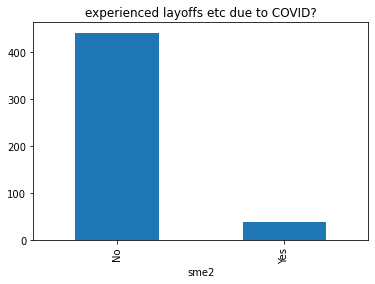

In [33]:
grouped['sme3'].plot.bar('sme3', title='experienced layoffs etc due to COVID?');